<img alt="Insight logo" src="https://image.cagle.com/161714/750/161714.png" align="left" hspace="10px" vspace="10px" width=100% height=50% >

<p style="font-size:20px; font-family: Trebuchet MS; font-style:italic;"> This dataset contains information about airplane crashes around the world. The data spans <span style="color:#122ecc;"> September 1908 to August 2008</span>. A variety of entities broadcast data about the air crashes, including<span style="color:#122ecc;"> country, continent, operator, fatality, aircraft type and reason for the accident</span>. This dataset currently contains <span style="color:red;">5268 records</span> of air crashes.</ />

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/favpng_fountain-pen-book-ballpoint-pen.png" align="left" hspace="10px" vspace="5px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:  bleu">Notebook highlights    </li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>The aim of this notebook is to present a proper approach to the questioning of datasets while maintaining the main objective of extracting various interesting facts.</li>
    <li>This notebook uses <span style="color:#122ecc;">Geopandas, Folium, Pandas, Numpy, Matplot and some other libraries </span> to plot data points.</li>  
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/favpng_question-mark-sign-symbol.png" align="left" hspace="25px" vspace="5px" width="40" height="50" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">Basic Questions</li>
</ul>

<div class="alert alert-danger" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>How<span style="color:#122ecc;"> many air crashes</span> occur in the world on <span style="color:#122ecc;">average each year</span>?</li>
    <li>What are the <span style="color:#122ecc;">most affected hours </span>for air crashes around the world?</li>
    <li>Which are the <span style="color:#122ecc;">most affected air operators </span>for air crashes around the world?</li>
    <li>Which<span style="color:#122ecc;"> year</span> had the <span style="color:#122ecc;">most air crashes</span> in the world?</li>
        <li>Which <span style="color:#122ecc;">country</span> has reported the<span style="color:#122ecc;"> most air crashes</span> between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">country</span> has reported the<span style="color:#122ecc;"> most fatilities</span> due to air crashes between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">continent</span> has reported the<span style="color:#122ecc;"> most air crashes</span> between 1908 and 2009? ?</li>
    <li>Which <span style="color:#122ecc;">continent</span> has reported the<span style="color:#122ecc;"> most fatilities</span> due to air crashes between 1908 and 2009? ?</li>
    <li>How much are the <span style="color:#122ecc;">survival</span> and <span style="color:#122ecc;">fatality chances </span>in air crashes?</li>


</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/DataAnalysislogo.png" align="left" hspace="25px" vspace="5px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">Data Analysis</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Downloading, cleaning, and preparing the Dataset</li> 
</ul>

In [27]:
#Install all the required libraries using pip 
!pip install wordcloud

   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
   ------- ------------------------------- 30.7/151.4 kB 187.9 kB/s eta 0:00:01
   ---------- ---------------------------- 41.0/151.4 kB 217.9 kB/s eta 0:00:01
   --------------------- ----------------- 81.9/151.4 kB 353.1 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/151.4 kB 532.5 kB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 475.4 kB/s eta 0:00:00


In [2]:
# Import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.impute import SimpleImputer
from datetime import datetime

In [3]:
# read & load the dataset into pandas dataframe
crashesDataframe = pd.read_csv(r"C:\Users\AMINE BOUDANES\Downloads\event1-datascience-CEC_CLUB-main\event1-datascience-CEC_CLUB-main\Competition\data\Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [4]:
obs, feat = crashesDataframe.shape
crashesDataframe.sample(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4964,12/18/2003,22:00,"Mitu, Colombia",Líneas Aéreas Suramericanas,NaN,El Yopal - Mitu,Douglas DC-9-15F,HK-4246X,47062,3.0,3.0,0.0,"While on approach to , the cargo plane obtaine..."
4576,08/19/1998,16:40,"Foveaux Strait, New Zealand",Vincent Aviation,NaN,Stewart Island - Invercargill,Cessna 402C,ZK-VAC,402C0512,10.0,5.0,0.0,"While en route, the aircraft experienced doubl..."
795,08/24/1946,NaN,"Cairo, Egypt",Misrair,NaN,NaN,Avro Anson,SU-ADJ,1272,9.0,6.0,0.0,Crashed and caught fire.
3989,02/01/1991,18:07,"LAX, Los Angeles, California",USAir / Skywest Airlilnes,1493/5569,Columbus - Los Angeles \ Los Angeles - Fresno,Boeing B-737-300 / Swearingen SA-227AC,N388US/N683AV,23310/1145 / AC-683,99.0,34.0,0.0,The Skywest Metroliner was told to taxi into p...
1499,09/18/1957,21:20,"Montevideo, Uruguay",REAL,NaN,San Pablo - Porto Alegre - Montevideo,Convair CV-440-62,PP-AQE,456,35.0,1.0,0.0,"Flying VFR, the aircraft encountered fog durin..."


In [5]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:


*  **Date** (date the crash had taken place)
* **Time** (time the crash had taken place)
* **Location** 
* **Operator **
* **Flight #** 
* **Route**
* **Type**
* **Registration**
* **cn/In ** - ?
* **Aboard **  - number of people aboard
* **Fatalities ** - lethal outcome
* **Ground** - saved people
* **Summary ** - brief summary of the case

In [6]:
# convert Date into Datetime Feature
#crashesDataframe.Date = pd.to_datetime(crashesDataframe.Date)

In [7]:
crashesDataframe

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [8]:
crashesDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [9]:
crashesDataframe.isnull().sum() #calculating missing values in rows

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

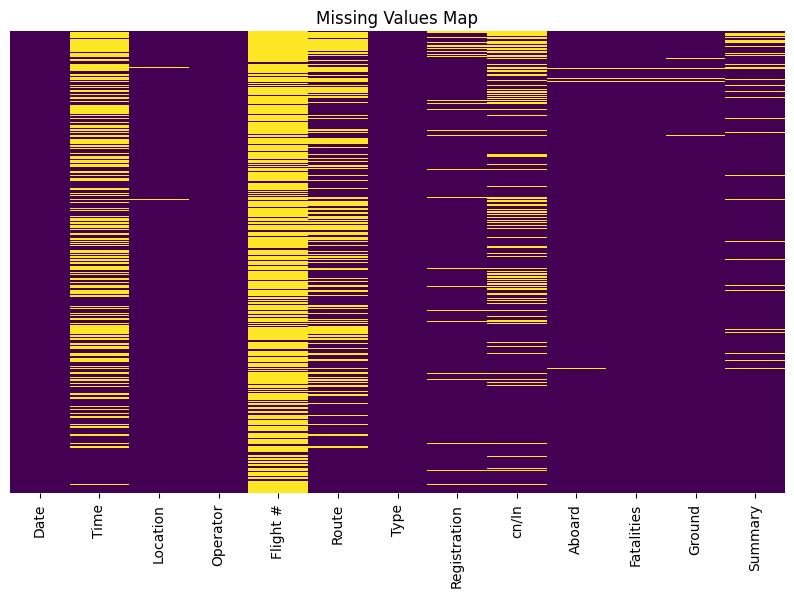

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(crashesDataframe.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Map')
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/year-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analyses by Year</li>
</ul>

## Data manipulation

we want to create a new row with 'Date + Time' format. I replaced all the missing values of Time with 0:00. Then I removed some wrong symbols and fixed broken values. 

In [11]:
#cleaning up
crashesDataframe['Time'] = crashesDataframe['Time'].replace(np.nan, '00:00') 
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('c: ', '')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('c:', '')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('c', '')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('12\'20', '12:20')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('18.40', '18:40')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('0943', '09:43')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('22\'08', '22:08')
crashesDataframe['Time'] = crashesDataframe['Time'].str.replace('114:20', '00:00') #is it 11:20 or 14:20 or smth else? 

crashesDataframe['Time'] = crashesDataframe['Date'] + ' ' + crashesDataframe['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
crashesDataframe['Time'] = crashesDataframe['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(crashesDataframe.Time.min()) + ' to ' + str(crashesDataframe.Time.max()))

crashesDataframe.Operator = crashesDataframe.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


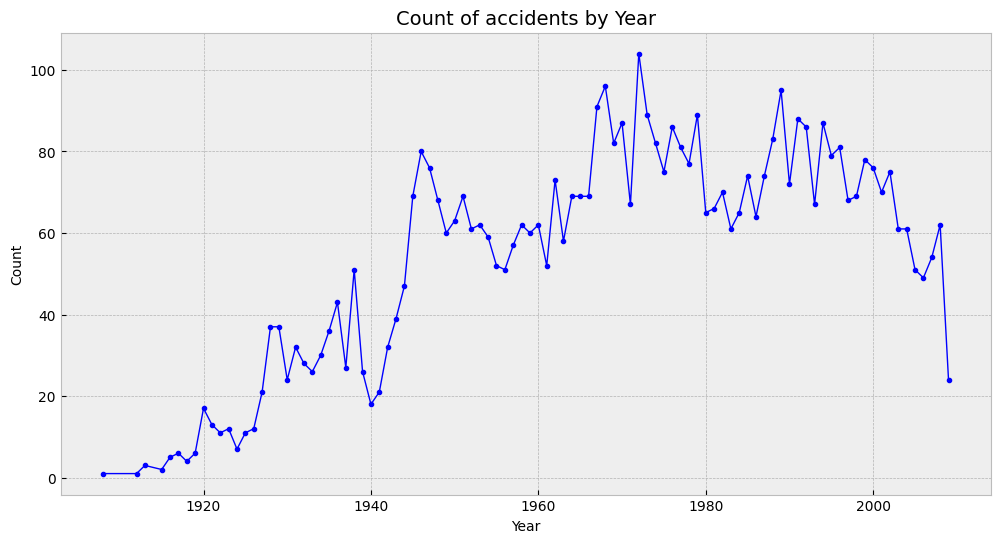

In [12]:
Temp = crashesDataframe.groupby(crashesDataframe.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/time-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analyses by Time</li>
</ul>

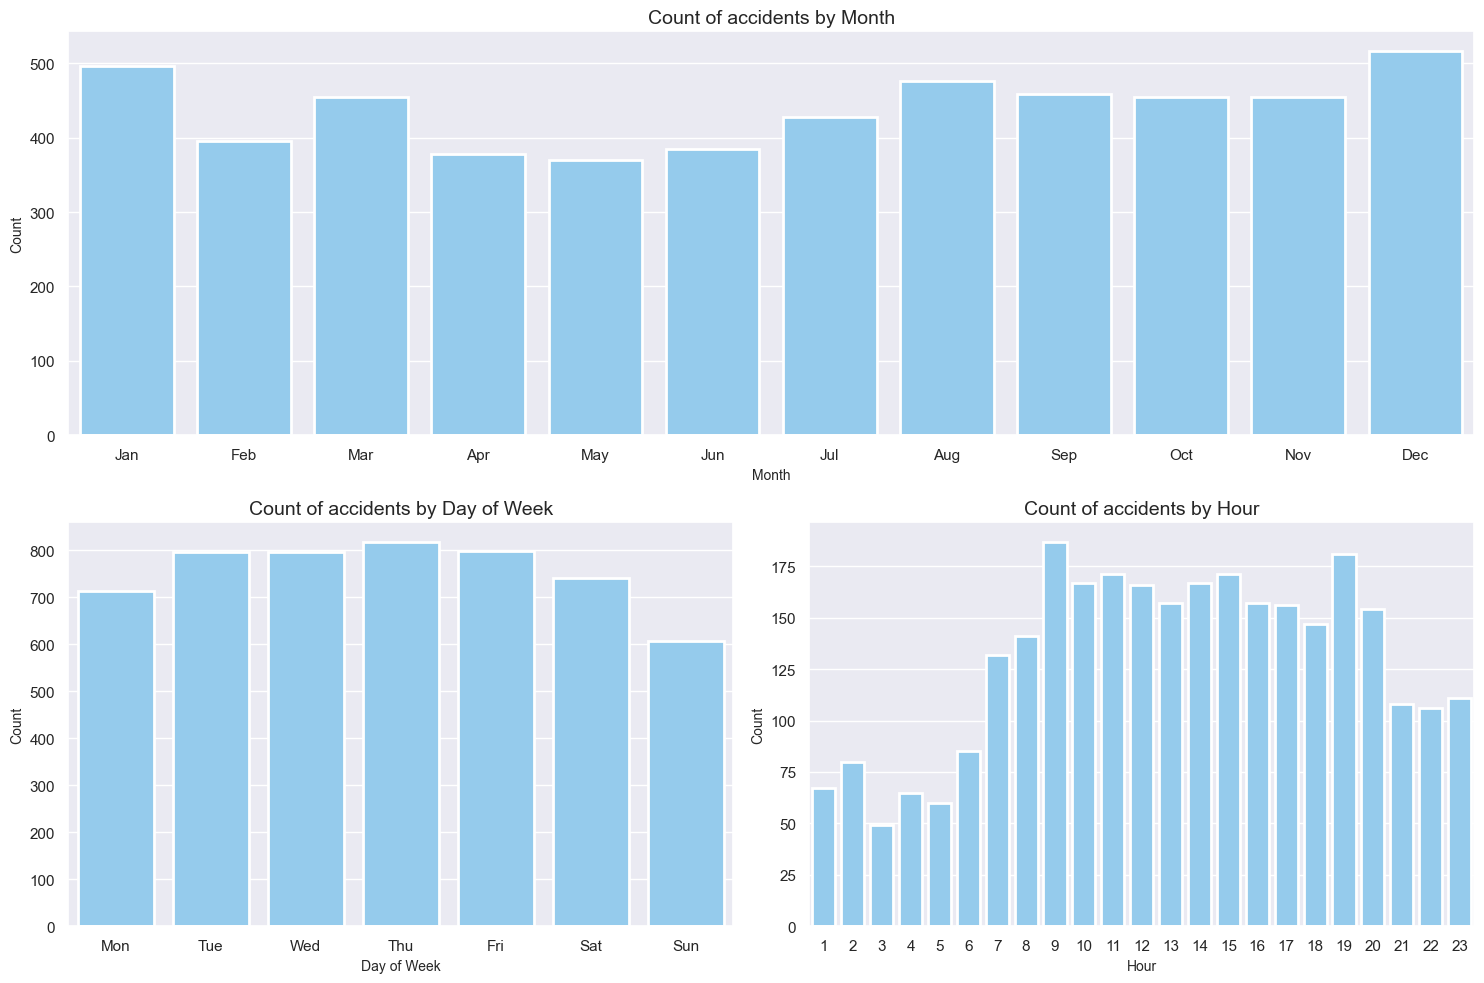

In [21]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15, 10))
sns.set()

# Plot 1
ax = pl.subplot(gs[0, :])  # row 0, col 0
monthly_counts = crashesDataframe.groupby(crashesDataframe.Time.dt.month)[['Date']].count().reset_index()
sns.barplot(x='Time', y='Date', data=monthly_counts, color='lightskyblue', linewidth=2)
plt.xticks(monthly_counts['Time']-1,['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

# Plot 2
ax = pl.subplot(gs[1, 0])
weekday_counts = crashesDataframe.groupby(crashesDataframe.Time.dt.weekday)[['Date']].count().reset_index()
sns.barplot(x='Time', y='Date', data=weekday_counts, color='lightskyblue', linewidth=2)
plt.xticks(weekday_counts['Time'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

# Plot 3
ax = pl.subplot(gs[1, 1])
hourly_counts = crashesDataframe[crashesDataframe.Time.dt.hour != 0].groupby(crashesDataframe.Time.dt.hour)[['Date']].count().reset_index()
sns.barplot(x='Time', y='Date', data=hourly_counts, color='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()


<p><img alt="Insight logo" src="https://cdn5.vectorstock.com/i/1000x1000/72/54/planes-top-view-jet-military-aircraft-flat-vector-26647254.jpg" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analyses by Type</li>
</ul>

### Military vs Passenger flights

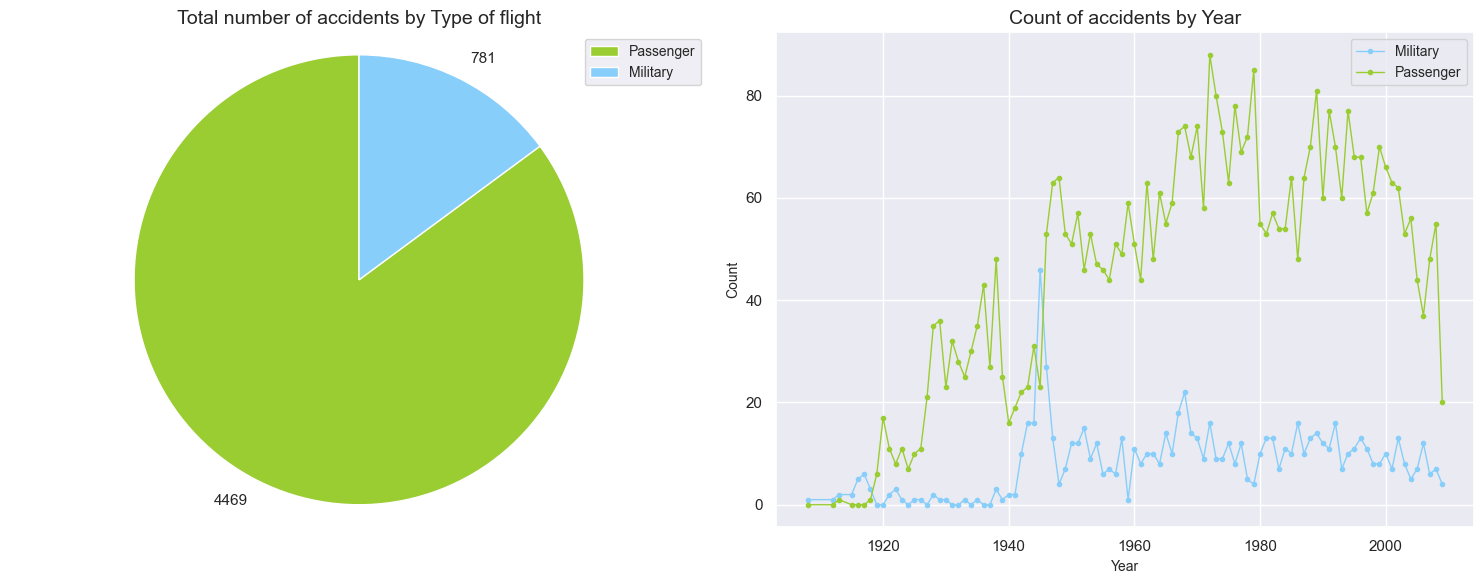

In [23]:
Temp = crashesDataframe.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = crashesDataframe.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Total number of Fatalities

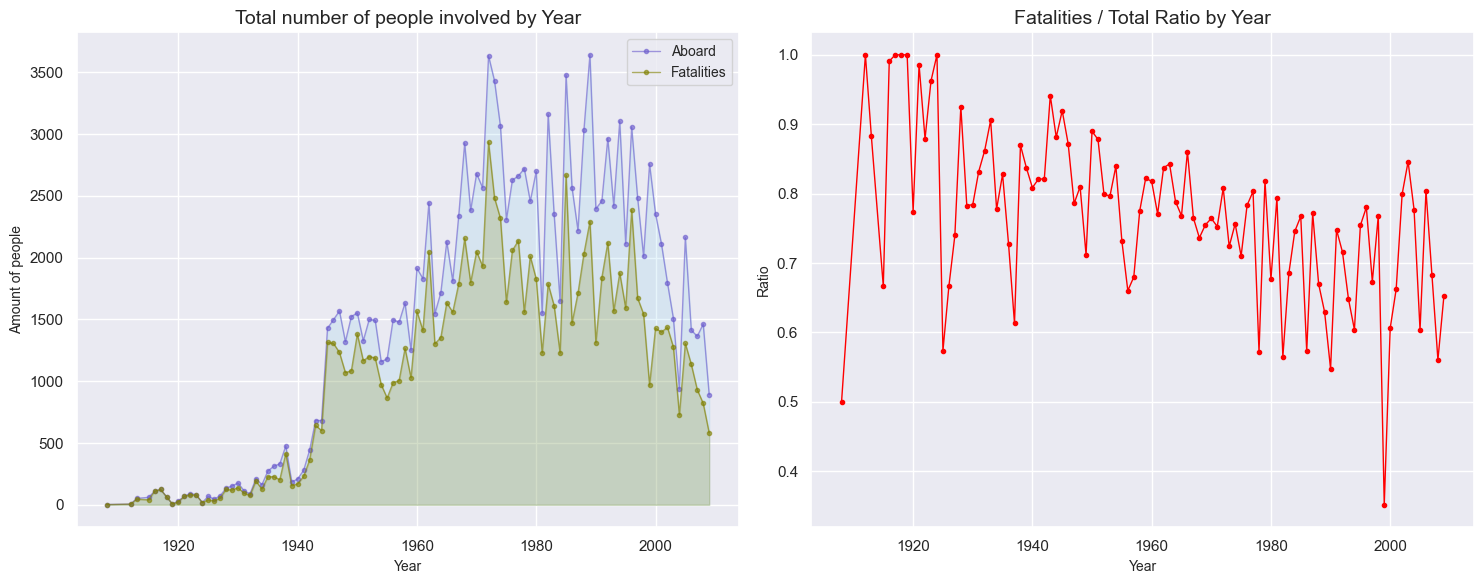

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


Fatalities = crashesDataframe.groupby(crashesDataframe.Time.dt.year)[['Aboard', 'Fatalities']].sum().reset_index()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15, 6))

# Plot 1
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities['Time'], 'Aboard', data=Fatalities, color="skyblue", alpha=0.2)
plt.plot(Fatalities['Time'], 'Aboard', data=Fatalities, marker=".", color="Slateblue", alpha=0.6, linewidth=1, label='Aboard')
plt.fill_between(Fatalities['Time'], 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities['Time'], 'Fatalities', data=Fatalities, color="olive", marker=".", alpha=0.6, linewidth=1, label='Fatalities')
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)

# Plot 2
plt.subplot(1, 2, 2)
plt.plot(Fatalities['Time'], 'Proportion', data=Fatalities, marker=".", color='red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)

plt.tight_layout()
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/statics.png" align="left" hspace="70px" vspace="5px" width="90" height="90" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analyses by Statics</li>
</ul>

In [13]:
ImputedValuesCrashesDataframe = crashesDataframe.copy()
numericData = ImputedValuesCrashesDataframe.select_dtypes(include=np.number).columns.tolist()
missingCounts = crashesDataframe[numericData].isna().sum().sort_values(ascending=False)
missingCounts[missingCounts > 0]

Aboard        22
Ground        22
Fatalities    12
dtype: int64

In [14]:
#Create the imputer
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(ImputedValuesCrashesDataframe[numericData])
ImputedValuesCrashesDataframe[numericData] = imputer.transform(ImputedValuesCrashesDataframe[numericData])

In [15]:
staticalAnalysisCrashesDataframe = ImputedValuesCrashesDataframe[numericData].copy()
#del staticalAnalysisCrashesDataframe['index']
staticalAnalysisCrashesDataframe.reset_index(drop=True, inplace=True)

In [16]:
staticalAnalysisCrashesDataframe.describe().style.background_gradient(cmap='icefire')

,Aboard,Fatalities,Ground
count,5268.000000,5268.000000,5268.000000
mean,27.554518,20.068303,1.608845
std,42.986652,33.162110,53.874957
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [17]:
# Correlation matrix
correlation_matrix = staticalAnalysisCrashesDataframe.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Aboard  Fatalities    Ground
Aboard      1.000000    0.756714  0.023236
Fatalities  0.756714    1.000000  0.035165
Ground      0.023236    0.035165  1.000000


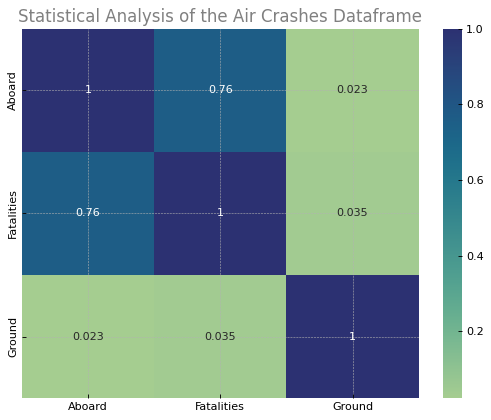

In [18]:
# plot correlation matrix using seaborn
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
sns.heatmap(correlation_matrix, annot=True, cmap="crest")

plt.title('Statistical Analysis of the Air Crashes Dataframe', size=15, color='grey')
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/countries-logo.png" align="left" hspace="50px" vspace="5px" width="70" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analyses by Country</li>
</ul>

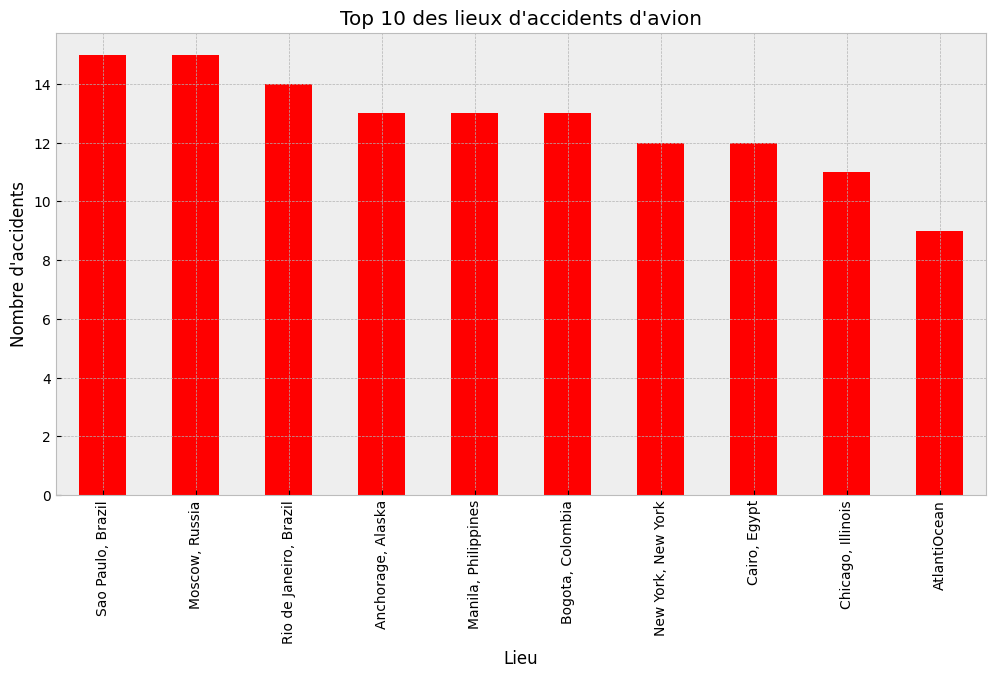

In [19]:
# Analyse des lieux d'accidents
top_locations = crashesDataframe['Location'].value_counts().head(10)

# Tracé des 10 principaux lieux d'accidents par nombre d'accidents
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar', color='red')
plt.title("Top 10 des lieux d'accidents d'avion")
plt.xlabel('Lieu')
plt.ylabel("Nombre d'accidents")
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>         
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">  
    <li>The graph above shows the <span style="font-weight: bold; color:#122ecc;"> rate of fatalities</span> and <span style="font-weight: bold; color:#122ecc;">survivors</span> in <span style="font-weight: bold; color:#122ecc;"> air crashes</span> every year from<span style="font-weight: bold; color:#122ecc;"> 1908</span> to <span style="font-weight: bold; color:#122ecc;">2009</span>.</li>     
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Operator-logo.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>
 <br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:bleu">&emsp;Analyses by Flight Operator</li>
</ul>

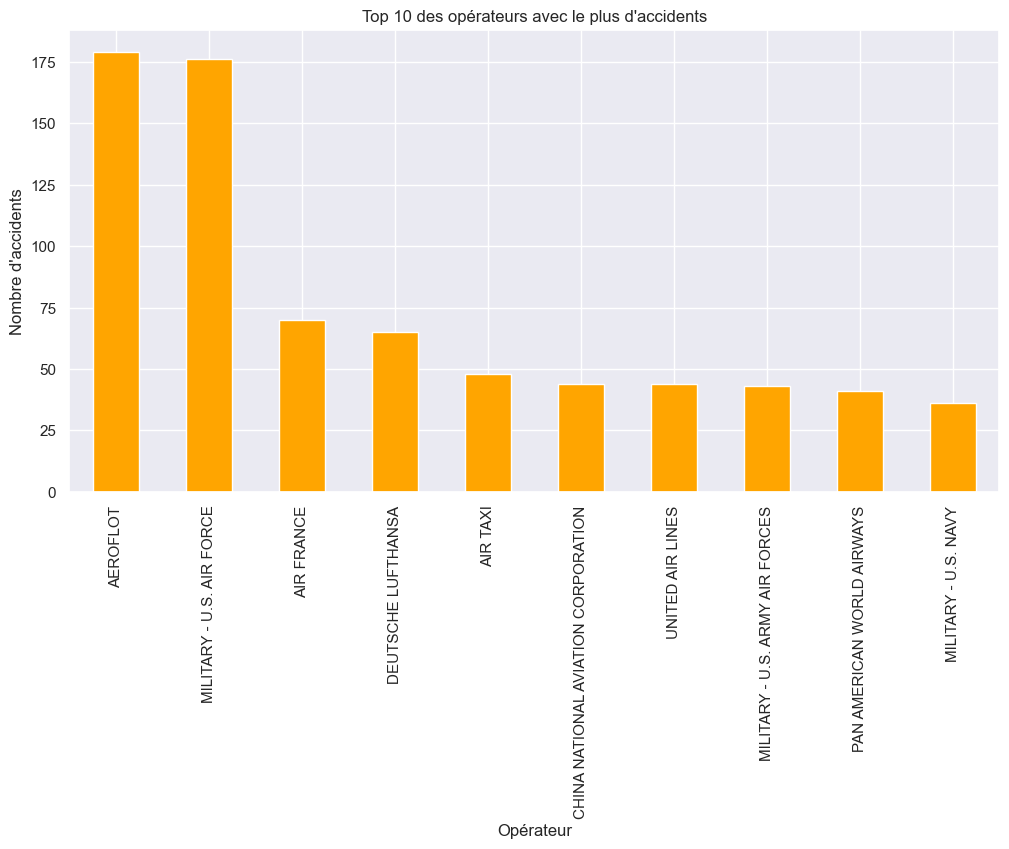

In [25]:
# Analyse des opérateurs
top_operators = crashesDataframe['Operator'].value_counts().head(10)

# Tracé des 10 principaux opérateurs par nombre d'accidents
plt.figure(figsize=(12, 6))
top_operators.plot(kind='bar', color='orange')
plt.title('Top 10 des opérateurs avec le plus d\'accidents')
plt.xlabel('Opérateur')
plt.ylabel('Nombre d\'accidents')
plt.show()

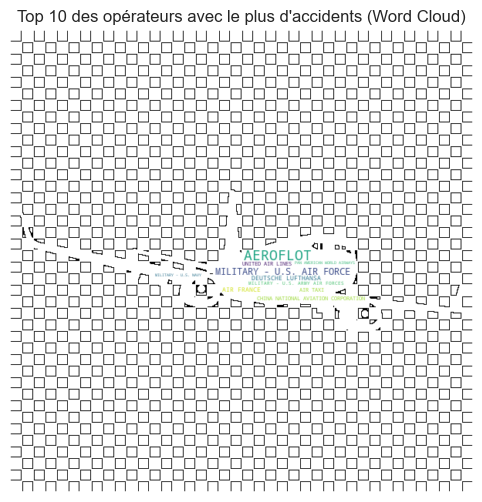

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# Load a silhouette image of an airplane
airplane_mask = np.array(Image.open(r"C:\Users\AMINE BOUDANES\Downloads\event1-datascience-CEC_CLUB-main\event1-datascience-CEC_CLUB-main\Competition\notebook\image.png"))

# Define stopwords if needed
stopwords = set(STOPWORDS)

# Analyse des opérateurs
top_operators = crashesDataframe['Operator'].value_counts().head(10)

# Create a WordCloud object with the airplane mask
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=airplane_mask, contour_color='black', contour_width=1, stopwords=stopwords).generate_from_frequencies(top_operators)

# Plot the WordCloud image
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 des opérateurs avec le plus d\'accidents (Word Cloud)')
plt.show()


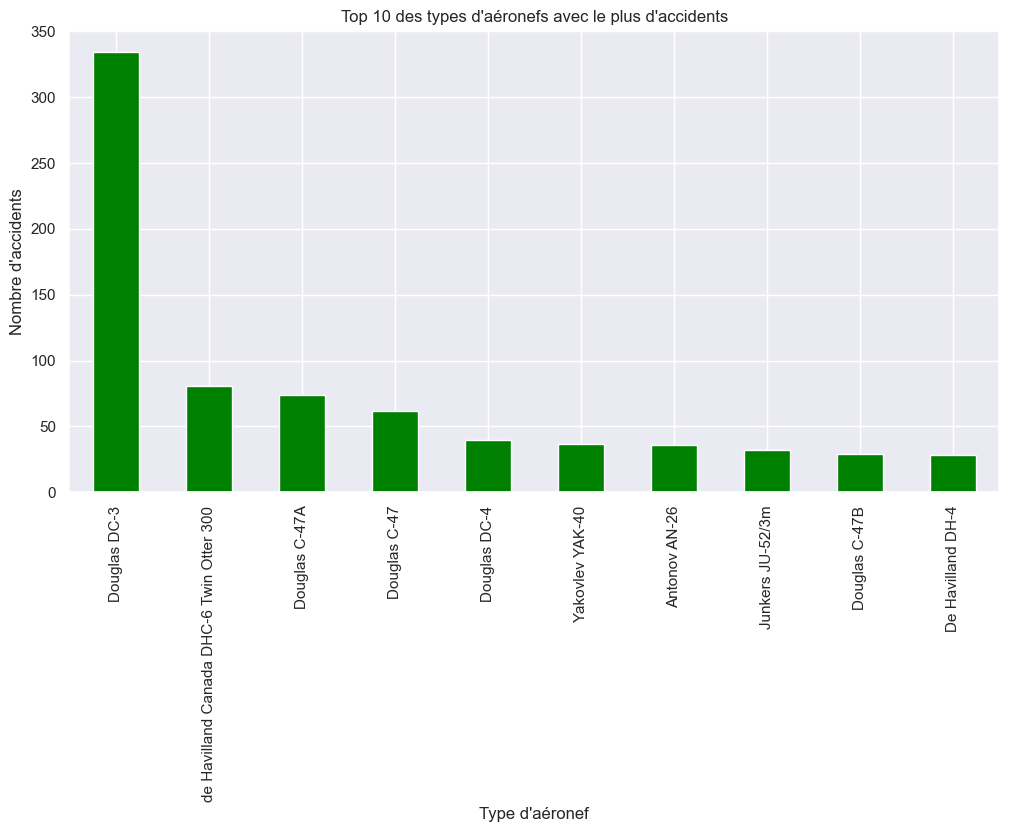

In [26]:
# Analyse des types d'aéronefs
top_aircraft_types = crashesDataframe['Type'].value_counts().head(10)

# Tracé des 10 principaux types d'aéronefs par nombre d'accidents
plt.figure(figsize=(12, 6))
top_aircraft_types.plot(kind='bar', color='green')
plt.title('Top 10 des types d\'aéronefs avec le plus d\'accidents')
plt.xlabel('Type d\'aéronef')
plt.ylabel('Nombre d\'accidents')
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/allinsight-logo.png" align="left" hspace="0px" vspace="10px" width="80" height="80"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;All Insights:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. The<span style="font-weight: bold; color:#122ecc;"> Map </span>summarizes information about each country where air crashes occurred, such as <span style="font-weight: bold; color:#122ecc;">Country's name</span>, <span style="font-weight: bold; color:#122ecc;">Continent</span>, <span style="font-weight: bold; color:#122ecc;">Year</span>, <span style="font-weight: bold; color:#122ecc;">Time</span>, <span style="font-weight: bold; color:#122ecc;">Air craft</span>, <span style="font-weight: bold; color:#122ecc;">Air Operator</span>, <span style="font-weight: bold; color:#122ecc;">Number of Crashes </span>and <span style="font-weight: bold; color:#122ecc;">Fatalities due to Air Crash</span>.</li>
    <br>
    <li>2. <span style="font-weight: bold; color:#122ecc;">Canada </span>has suffered <span style="font-weight: bold; color:#122ecc;">92 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest</span> in the world.</li>
    <br>
    <li>3. <span style="font-weight: bold; color:#122ecc;"> Colombia </span>has suffered <span style="font-weight: bold; color:#122ecc;">86 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>4. In <span style="font-weight: bold; color:#122ecc;">Slovenia</span>,
        <span style="font-weight: bold; color:#122ecc;">Lebanon</span>,
 <span style="font-weight: bold; color:#122ecc;">Albania</span>,
 <span style="font-weight: bold; color:#122ecc;">Tajikistan</span>,
<span style="font-weight: bold; color:#122ecc;">Belize</span>,
 <span style="font-weight: bold; color:#122ecc;">Botswana</span>,
 <span style="font-weight: bold; color:#122ecc;">Israel</span>,
<span style="font-weight: bold; color:#122ecc;">Ghana</span>,
<span style="font-weight: bold; color:#122ecc;">Kyrgyzstan</span>,
<span style="font-weight: bold; color:#122ecc;">Bangladeshr</span>,
 <span style="font-weight: bold; color:#122ecc;">Croatia</span>,
 <span style="font-weight: bold; color:#122ecc;">Yemen</span>
 <span style="font-weight: bold; color:#122ecc;">Mali</span>,
 <span style="font-weight: bold; color:#122ecc;">Central African Rep.</span>,
 <span style="font-weight: bold; color:#122ecc;">Luxembourg</span>,
 <span style="font-weight: bold; color:#122ecc;">Qatar</span>,
 <span style="font-weight: bold; color:#122ecc;">Czechia</span>,
 <span style="font-weight: bold; color:#122ecc;">Suriname</span>,
 <span style="font-weight: bold; color:#122ecc;">Benin</span>,
 <span style="font-weight: bold; color:#122ecc;">Tunisia</span>,
 <span style="font-weight: bold; color:#122ecc;">Belarus</span>,
 <span style="font-weight: bold; color:#122ecc;">Bulgaria</span>,
 <span style="font-weight: bold; color:#122ecc;">Eritrea</span> and
 <span style="font-weight: bold; color:#122ecc;">Malawi</span>, there have been only <span style="font-weight: bold; color:#122ecc;">one air crash </span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span> .</li>
    <br>
    <li>5. <span style="font-weight: bold; color:#122ecc;">India </span>has suffered <span style="font-weight: bold; color:#122ecc;">2456 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">61 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest rate</span> in the world.</li>
    <br>
    <li>6. <span style="font-weight: bold; color:#122ecc;"> Colombia </span>has suffered <span style="font-weight: bold; color:#122ecc;">2091 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">86 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>7. <span style="font-weight: bold; color:#122ecc;"> Czechia</span> and <span style="font-weight: bold; color:#122ecc;">Qatar </span>has the <span style="font-weight: bold; color:#122ecc;">lowest number of fatalities</span> due to air crashes, with <span style="font-weight: bold; color:#122ecc;">two fatalities</span> in a<span style="font-weight: bold; color:#122ecc;"> single crashes </span>.</li>
    <br>
    <li>8. <span style="font-weight: bold; color:#122ecc;">Asia </span>has suffered <span style="font-weight: bold; color:#122ecc;">490 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest</span> in the world.</li>
    <br>
    <li>9. <span style="font-weight: bold; color:#122ecc;"> Europe </span>has suffered <span style="font-weight: bold; color:#122ecc;">435 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>10. In <span style="font-weight: bold; color:#122ecc;">Oceania</span>, there are <span style="font-weight: bold; color:#122ecc;">75 air crashes</span> from <span style="font-weight: bold; color:#122ecc;">1908 to 2009</span>, the <span style="font-weight: bold; color:#122ecc;">lowest number</span> in the world.</li>
    <br> 
    <li>11. <span style="font-weight: bold; color:#122ecc;">Asia </span>has suffered <span style="font-weight: bold; color:#122ecc;">19751 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">490 air crashes</span>, which is the<span style="font-weight: bold; color:#122ecc;"> highest rate</span> in the world.</li>
    <br>
    <li>12. <span style="font-weight: bold; color:#122ecc;"> Europe </span>has suffered <span style="font-weight: bold; color:#122ecc;">15064 fatalities</span> in <span style="font-weight: bold; color:#122ecc;">435 air crashes</span>, the<span style="font-weight: bold; color:#122ecc;"> second highest </span>in the world.</li>
    <br>
    <li>13. <span style="font-weight: bold; color:#122ecc;"> Oceania </span>has the <span style="font-weight: bold; color:#122ecc;">lowest number of fatalities</span> due to air crashes, with <span style="font-weight: bold; color:#122ecc;">1230 fatalities</span> in<span style="font-weight: bold; color:#122ecc;"> 75 air crashes</span>.</li>
    <br>
    <li>14. The <span style="font-weight: bold; color:#122ecc;"> maximum number of air crashes</span> is <span style="font-weight: bold; color:#122ecc;"> 104</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1972</span> between 1908 and 2009.</li>
    <br>
    <li>15. <span style="font-weight: bold; color:#122ecc;"> 1912 </span>and <span style="font-weight: bold; color:#122ecc;">1908</span> had the  <span style="font-weight: bold; color:#122ecc;">fewest air crashes</span>, only<span style="font-weight: bold; color:#122ecc;"> one </span>between 1908 to 2009.</li>
    <br>
     <li>16. The <span style="font-weight: bold; color:#122ecc;"> maximum number of fatalities</span> is <span style="font-weight: bold; color:#122ecc;">2937</span> in <span style="font-weight: bold; color:#122ecc;">104 air crashes</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1972</span> between 1908 and 2009.</li>
    <br>
    <li>17. The <span style="font-weight: bold; color:#122ecc;"> minimum number of fatalities</span> is <span style="font-weight: bold; color:#122ecc;">1</span> in a<span style="font-weight: bold; color:#122ecc;">single air crash</span>, occurred in <span style="font-weight: bold; color:#122ecc;">1908</span> between 1908 and 2009.</li>
    <br>
    <li>18. The graph shows the <span style="font-weight: bold; color:#122ecc;"> rate of fatalities</span> and <span style="font-weight: bold; color:#122ecc;">survivors</span> in <span style="font-weight: bold; color:#122ecc;"> air crashes</span> every year from<span style="font-weight: bold; color:#122ecc;"> 1908</span> to <span style="font-weight: bold; color:#122ecc;">2009</span>.</li>     
    <br>
     <li>19. Globally, the <span style="font-weight: bold; color:#122ecc;"> most air crashes</span> occurred around <span style="font-weight: bold; color:#122ecc;">9:00</span> in the <span style="font-weight: bold; color:#122ecc;"> morning</span>.</li>     
    <br>
    <li>20. <span style="font-weight: bold; color:#122ecc;"> Nighttime 3:00</span> is the <span style="font-weight: bold; color:#122ecc;">least affected time duration</span> when air crashes occurred from the year<span style="font-weight: bold; color:#122ecc;"> 1908</span> to<span style="font-weight: bold; color:#122ecc;"> 2009</span>.</li>
    <br>
     <li>21. Out of all Air Operators,<span style="font-weight: bold; color:#122ecc;"> Passenger Airlines</span> are the <span style="font-weight: bold; color:#122ecc;">most affected ones</span>, with <span style="font-weight: bold; color:#122ecc;"> 89.2%</span>.</li>     
    <br>          
    <li>22. <span style="font-weight: bold; color:#122ecc;"> Military Operators</span> are the<span style="font-weight: bold; color:#122ecc;"> second most</span> affected ones. Among them, <span style="font-weight: bold; color:#122ecc;">Air Force</span> has experienced<span style="font-weight: bold; color:#122ecc;"> more crashes</span> , around <span style="font-weight: bold; color:#122ecc;"> 78%</span>.</li>
    <br>
    <li>23. With the <span style="font-weight: bold; color:#122ecc;"> highest fatality rate</span> the graphs clearly show that<span style="font-weight: bold; color:#122ecc;"> Passenger Airlines</span> are the <span style="font-weight: bold; color:#122ecc;">most affected Air Operators</span>, almost every year.</li>     
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/refrences-logo.png" align="left" hspace="0px" vspace="10px" width="80" height="80"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;Refrences:</li>
</ul>      

<div class="alert alert-warning" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. <span style="font-weight: bold; color:#122ecc;"> https://matplotlib.org/3.1.1/gallery/index.html</li>     
    <br>          
    <li>2. <span style="font-weight: bold; color:#122ecc;"> https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/</li>     
    <br>
    <li>3. <span style="font-weight: bold; color:#122ecc;">https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html#Hue</li>     
    <br> 
    <li>4. <span style="font-weight: bold; color:#122ecc;">https://www.pngegg.com/</li>     
    <br>   
</ul>
</div>

 <img alt="Insight logo" src="https://mir-s3-cdn-cf.behance.net/project_modules/1400_opt_1/0c795874333139.5c3e657b811ff.gif" align="left" hspace="0px" vspace="0px" width=100% height=0 >
 
